<a href="https://colab.research.google.com/github/s1063724/2024python_analysis/blob/main/example/0124%E5%A4%9A%E5%85%83%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#根據每天的氣候因數, 決定城市準備共享單車的數量
#https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv'

import pandas as pd
# 韓國編碼gbk
df = pd.read_csv(url, encoding='gbk', index_col = ['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 01/12/2017 to 30/11/2018
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(癈)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(癈)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Seasons                   8760 non-null   object 
 11  Holiday                   8760 non-null   object 
 12  Functioning Day           8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 958.

In [16]:
#資料清理 (Data cleaning)
# 資料備份
data = df.copy()
# Functioning Day:有運作
# 裡面的data在做欄位篩選，然後就會蓋掉資料原來的樣貌(過濾)
# 取得單一欄位資料(型別為DataFrame)
data = data[data['Functioning Day'] == 'Yes']
data
# print(type(data))
# print(data.info())

# # 取得單一欄位資料(型別為Series)
# data = data['Functioning Day']
# print(type(data))
# # 取得單一欄位資料(型別為DataFrame)
# data = data[data['Functioning Day'] == 'Yes']
# print(type(data))

,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [17]:
# 因為該欄位只剩下Yes的資料，所以此欄位沒用了
data.pop('Functioning Day') #只能拿掉一次

Date
01/12/2017    Yes
01/12/2017    Yes
01/12/2017    Yes
01/12/2017    Yes
01/12/2017    Yes
             ... 
30/11/2018    Yes
30/11/2018    Yes
30/11/2018    Yes
30/11/2018    Yes
30/11/2018    Yes
Name: Functioning Day, Length: 8465, dtype: object

In [18]:
data

,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
Date,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday


In [19]:
# info、describe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 01/12/2017 to 30/11/2018
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8465 non-null   int64  
 1   Hour                      8465 non-null   int64  
 2   Temperature(癈)            8465 non-null   float64
 3   Humidity(%)               8465 non-null   int64  
 4   Wind speed (m/s)          8465 non-null   float64
 5   Visibility (10m)          8465 non-null   int64  
 6   Dew point temperature(癈)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)   8465 non-null   float64
 8   Rainfall(mm)              8465 non-null   float64
 9   Snowfall (cm)             8465 non-null   float64
 10  Seasons                   8465 non-null   object 
 11  Holiday                   8465 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 1.1+ MB


In [21]:
#NaN 空值(若沒空值就不會清除)
data = data.dropna()
# 處理亂碼
data = data.rename(columns={'Temperature(癈)':'Temperature(*C)', 'Dew point temperature(癈)':'Dew point(*C)'})
data

,Rented Bike Count,Hour,Temperature(*C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point(*C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
Date,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday


In [23]:
#label encoder 將文字資料轉成對應的數字
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Seasons'] = le.fit_transform(data['Seasons'])
data['Holiday'] = le.fit_transform(data['Holiday'])
data

,Rented Bike Count,Hour,Temperature(*C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point(*C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
Date,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1
30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1
30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1


In [24]:
# 目標
target = data.pop('Rented Bike Count')

In [25]:
target

Date
01/12/2017     254
01/12/2017     204
01/12/2017     173
01/12/2017     107
01/12/2017      78
              ... 
30/11/2018    1003
30/11/2018     764
30/11/2018     694
30/11/2018     712
30/11/2018     584
Name: Rented Bike Count, Length: 8465, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data.values, target.values, test_size=0.2)

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(data_train, target_train)

pre = regr.predict(data_test)
# 預測結果(單車數量)
print(pre.round())
# 實際結果(單車數量)
print(target_test)

[ 310.  572.    9. ...  604.  694. 1260.]
[ 196  450  224 ...  328  406 1662]


In [29]:
#1.決定係數(相關係數)
# 訓練分數
print(regr.score(data_train, target_train).round(3))
# 驗證分數
print(regr.score(data_test, target_test).round(3))
# 係數<0.7，所以此模型不准

0.545
0.523


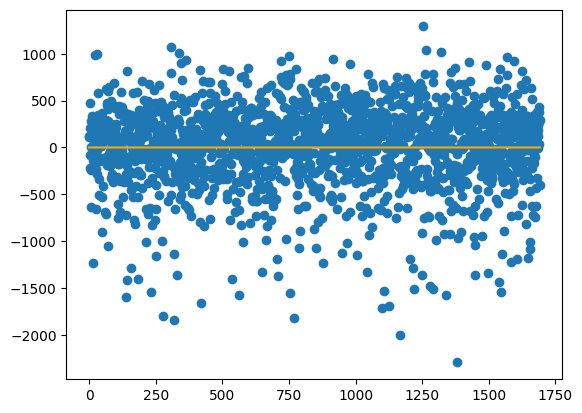

In [30]:
#殘差圖
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(pre.size)
y = x*0
plt.scatter(x, pre-target_test)
plt.plot(x, y, color='orange')
plt.show()